In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
from scipy.stats import mannwhitneyu

I will start by exploring the data. A quick look at the head of the dataframe shows a lot of NaN input in columns such as Food, Species, and Serotype/Genotype. I'll use the describe function to see if the "Hospitalizations" and "Fatalities" columns have NaN values. I'll also count unique values in selections of the "Fatalities" data before I use it for probability tests, to make sure there are enough non-zero values to analyze.

In [3]:
outbreaks = pd.read_csv('outbreaks.csv')

In [3]:
outbreaks.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [4]:
outbreaks.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,15494.000000,15518.000000
mean,2005.562373,19.537162,0.947528,0.021717
std,5.158404,49.452417,5.312772,0.386976
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,3.000000,0.000000,0.000000
50%,2005.000000,8.000000,0.000000,0.000000
75%,2010.000000,19.000000,1.000000,0.000000
max,2015.000000,1939.000000,308.000000,33.000000


It looks like there are 19,119 rows of data, but fewer values counted for the "Hospitalizations" and "Fatalities" columns. These columns must have NaN values as well as zero values.

In [5]:
fatal = outbreaks.replace(np.nan,0)
fatal.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,19119.000000,19119.000000
mean,2005.562373,19.537162,0.767875,0.017626
std,5.158404,49.452417,4.797041,0.348735
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,3.000000,0.000000,0.000000
50%,2005.000000,8.000000,0.000000,0.000000
75%,2010.000000,19.000000,0.000000,0.000000
max,2015.000000,1939.000000,308.000000,33.000000


In [4]:
#Group by year in order to sum up illnesses.
year_index = pd.DataFrame(outbreaks.groupby('Year').sum())


Text(0.5,1,'Reported Foodborne Illnesses 1998-2015 in the US')

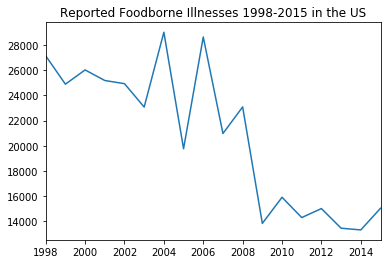

In [7]:
plt.plot(year_index['Illnesses'])
plt.xlim(1998,2015)
plt.title('Reported Foodborne Illnesses 1998-2015 in the US')

[Text(0,0.5,'Reported Illnesses'), Text(0.5,0,'Year')]

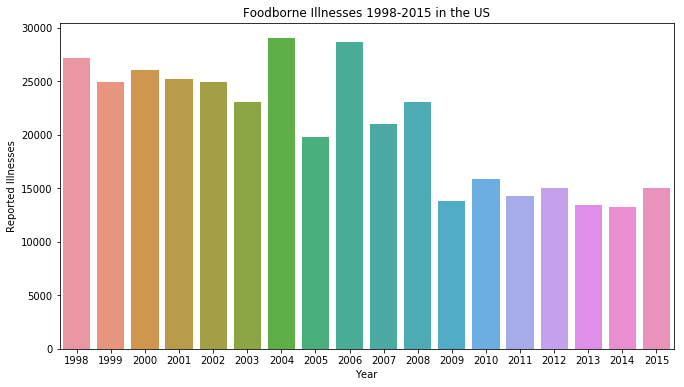

In [7]:
a4_dims = (11, 6)
fig, ax = plt.subplots(figsize=a4_dims)
year = year_index.index
sb.barplot(x=year, y='Illnesses', data = year_index)
plt.title('Foodborne Illnesses 1998-2015 in the US')
ax.set(xlabel = 'Year',ylabel = 'Reported Illnesses')

I see an overall trend downward for foodborne illnesses 1998-2015. However there are some peaks in 2004 and 2006.

[Text(0,0.5,'Reported Fatalities'), Text(0.5,0,'Year')]

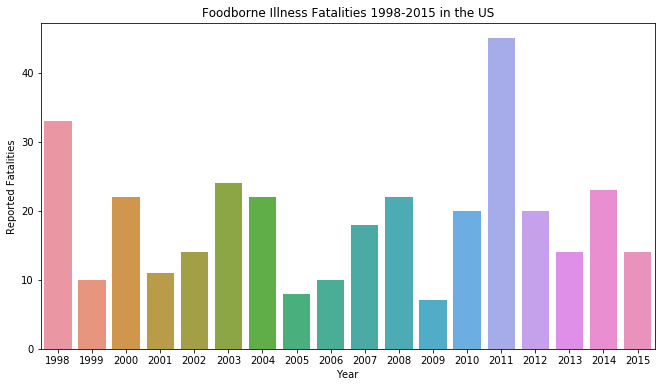

In [8]:
a4_dims = (11, 6)
fig, ax = plt.subplots(figsize=a4_dims)
year = year_index.index
sb.barplot(x=year, y='Fatalities', data = year_index)
plt.title('Foodborne Illness Fatalities 1998-2015 in the US')

ax.set(xlabel = 'Year', ylabel = 'Reported Fatalities')

A look at annual data on fatalities does not show any overall trends from 1998 to 2015, but it does show an unusually bad year for food poisoning deaths in 2011. I'd like to look into what happened in 2011 to cause so many fatalities and I'd also like to see what caused one of the peaks in illnesses. I'll pick 2006 at random.

In [9]:
#Shorten food labels
outbreaks['Foodsplit'] = outbreaks['Food'].apply(lambda x: (x.split(';')[0]) if x == x else np.nan)

In [10]:
#Shorten species labels
outbreaks['Speciessplit'] = outbreaks['Species'].apply(lambda x: (x.split(';')[0]) if x == x else np.nan)

In [11]:
#Select data from 2006
year2006 = outbreaks.loc[outbreaks['Year']==2006]
#select data from 2011
year2011 = outbreaks.loc[outbreaks['Year']==2011]

In [12]:
#Group by food contaminants in 2006
species_index = pd.DataFrame(year2006.groupby('Speciessplit').sum())
species_index2 = species_index.sort_values(by = 'Illnesses', ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

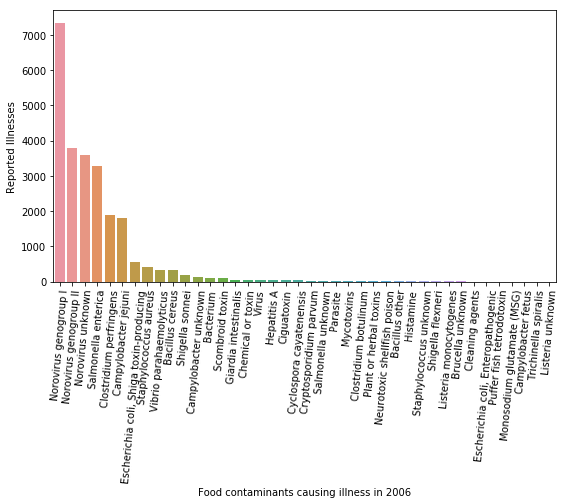

In [13]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)

species = species_index2.index
sb.barplot(x = species, y = 'Illnesses', data = species_index2)


ax.set(xlabel='Food contaminants causing illness in 2006', ylabel='Reported Illnesses')
plt.xticks(rotation=85)

In [14]:
# Select top foods contaminated with norovirus in 2006
year2006i = year2006[year2006['Speciessplit'] == 'Norovirus genogroup I']
food_index06 = pd.DataFrame(year2006i.groupby('Foodsplit').sum())
food_index306 = food_index06[food_index06['Illnesses']>100]
food_index206 = food_index306.sort_values(by = 'Illnesses', ascending = False)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

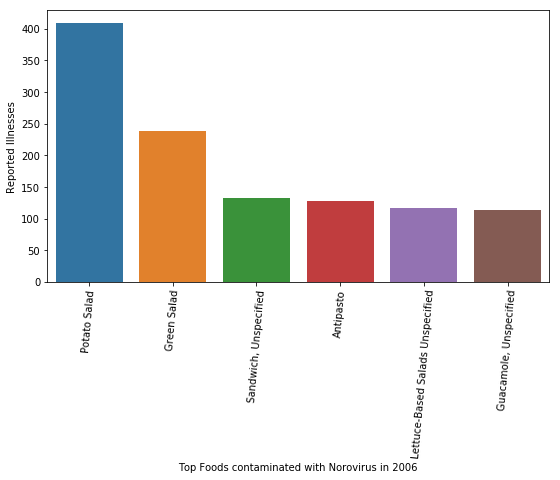

In [15]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)

food = food_index206.index
sb.barplot(x = food, y = 'Illnesses', data = food_index206)

ax.set(xlabel='Top Foods contaminated with Norovirus in 2006', ylabel='Reported Illnesses')
plt.xticks(rotation=85)

It looks like Norovirus genogroup I in potato salad infected many more people in 2006 than the other contaminants so maybe this was responsible for the jump in foodborne illnesses in 2006. I'd like to find out if Norovirus has a different pattern of infection that might explain why it infected so many more people. Perhaps, since it is a contagious virus, it infects more people per outbreak or maybe it spreads more easily creating new outbreaks. Let me compare boxplots of 2006 foodborne illnesses with those of the seemingly more typical years preceding and following it, 2005 and 2007. Does norovirus show up in 2005 and 2007? Does 2006 show a different outbreak pattern of infection than 2005 and 2007?

In [16]:
year2006 = outbreaks[outbreaks['Year'].isin(['2006'])]


In [17]:
year2007 = outbreaks[outbreaks['Year'].isin(['2007'])]


In [18]:
year2005 = outbreaks[outbreaks['Year'].isin(['2005'])]

In [19]:
#Group by food contaminants in 2005
species_index = pd.DataFrame(year2005.groupby('Speciessplit').sum())
species_index2 = species_index.sort_values(by = 'Illnesses', ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

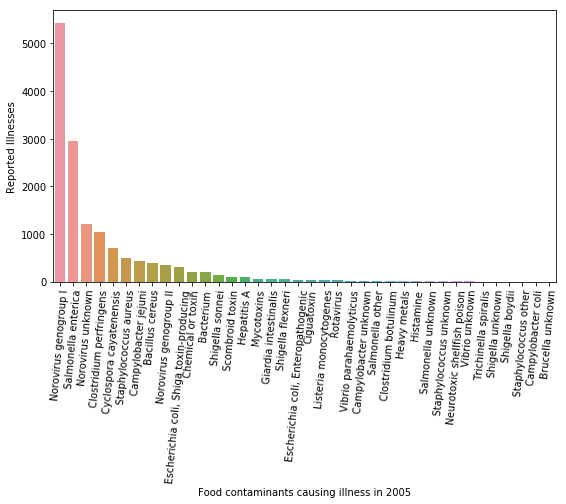

In [20]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)

species = species_index2.index
sb.barplot(x = species, y = 'Illnesses', data = species_index2)


ax.set(xlabel='Food contaminants causing illness in 2005', ylabel='Reported Illnesses')
plt.xticks(rotation=85)

In [21]:
#Group by food contaminants in 2007
species_index = pd.DataFrame(year2007.groupby('Speciessplit').sum())
species_index2 = species_index.sort_values(by = 'Illnesses', ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

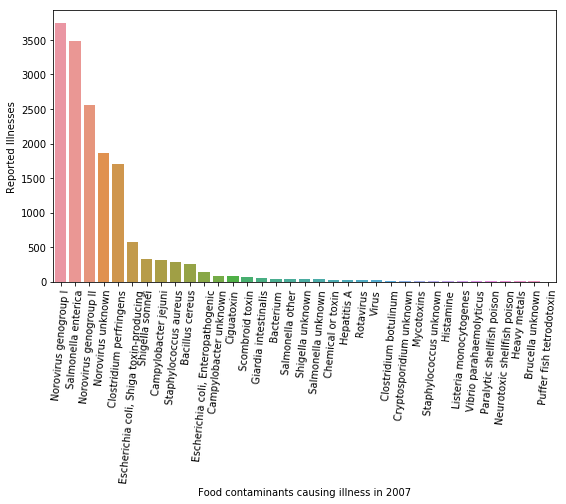

In [22]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)

species = species_index2.index
sb.barplot(x = species, y = 'Illnesses', data = species_index2)

ax.set(xlabel='Food contaminants causing illness in 2007', ylabel='Reported Illnesses')
plt.xticks(rotation=85)

It looks like Norovirus genogroup I shows up in all 3 years but in 2006 it was reported the most. There were also Norovirus genogroup II and other unknown Norovirus outbreaks in 2006. 2006 was a particularly bad year for Norovirus.

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


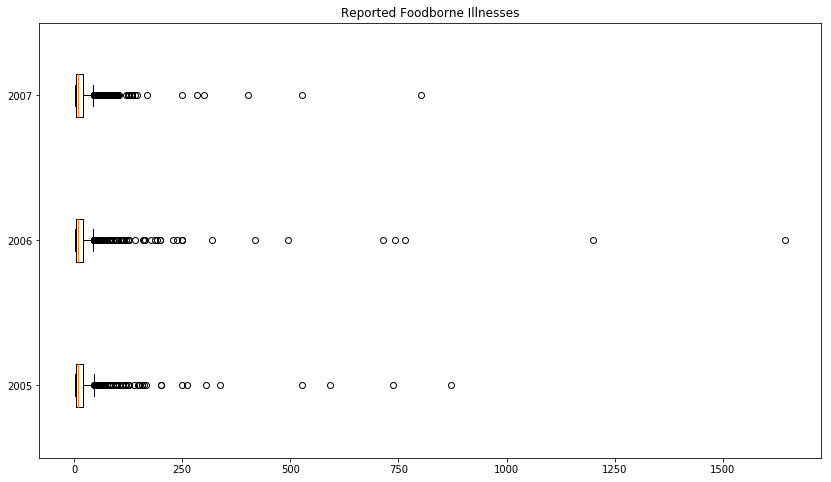

In [23]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
boxes = [year2005['Illnesses'], year2006['Illnesses'], year2007['Illnesses']]
plt.boxplot(boxes,positions = [1,2,3], vert = False,labels = ['2005', '2006','2007'] )
plt.title('Reported Foodborne Illnesses')
plt.show()


The medians and modes for the Illnesses data in these years seem to be fairly similar. There are means of 20.6, 22.8, and 19.3, and medians of 8,9, and 9,respectively for 2005,2006, and 2007. The most obvious difference between 2006 datapoints and the other 2 years is that the max values in 2005 and 2007 are 872 and 802, respectively, while the max for 2006 is 1644. It looks like what set 2006 apart were outbreaks with unusually high numbers of reported illnesses. Norovirus was likely responsible for these. I'll use a histogram to better see what the pattern of infection looks like for Norovirus genogroup I, but first I'd like to see why there were so many fatalities in 2011.

In [24]:
np.median(year2005["Illnesses"])

8.0

In [25]:
np.median(year2006["Illnesses"])

9.0

In [26]:
np.median(year2007["Illnesses"])

9.0

In [27]:
year2005.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,959.0,959.000000,793.000000,798.000000
mean,2005.0,20.605839,0.746532,0.010025
std,0.0,53.024387,2.738625,0.111564
min,2005.0,2.000000,0.000000,0.000000
25%,2005.0,4.000000,0.000000,0.000000
50%,2005.0,8.000000,0.000000,0.000000
75%,2005.0,21.000000,0.000000,0.000000
max,2005.0,872.000000,56.000000,2.000000


In [28]:
year2006.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,1255.0,1255.000000,1023.000000,1031.000000
mean,2006.0,22.833466,1.143695,0.009699
std,0.0,74.714065,6.101063,0.170388
min,2006.0,2.000000,0.000000,0.000000
25%,2006.0,4.000000,0.000000,0.000000
50%,2006.0,9.000000,0.000000,0.000000
75%,2006.0,20.000000,1.000000,0.000000
max,2006.0,1644.000000,129.000000,5.000000


In [29]:
year2007.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,1088.0,1088.000000,952.000000,951.000000
mean,2007.0,19.273897,0.921218,0.018927
std,0.0,40.378230,4.063260,0.199101
min,2007.0,2.000000,0.000000,0.000000
25%,2007.0,4.000000,0.000000,0.000000
50%,2007.0,9.000000,0.000000,0.000000
75%,2007.0,20.000000,1.000000,0.000000
max,2007.0,802.000000,108.000000,3.000000


In [30]:
#Group by species in 2011.
year2011 = outbreaks[outbreaks['Year'] == 2011]
year2011f = pd.DataFrame(year2011[year2011['Fatalities']>0])
species_index = pd.DataFrame(year2011f.groupby('Speciessplit')['Fatalities'].sum())

[Text(0,0.5,'Reported Fatalities'),
 Text(0.5,0,'Food contaminants causing fatalities in 2011')]

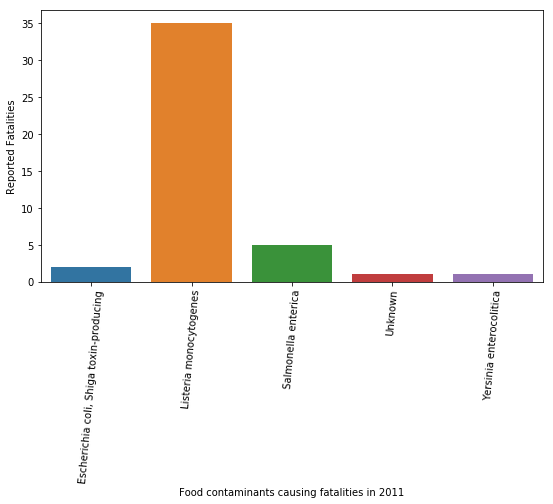

In [31]:

a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)
species = species_index.index

sb.barplot(x = species, y = 'Fatalities', data = species_index)
plt.xticks(rotation=85)
ax.set(xlabel='Food contaminants causing fatalities in 2011', ylabel='Reported Fatalities')

In [32]:
#Groupby food in 2011
year2011 = outbreaks[outbreaks['Year'] == 2011]
year2011f = year2011[year2011['Fatalities']>0]
food_index = pd.DataFrame(year2011f.groupby('Foodsplit')['Fatalities'].sum())

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

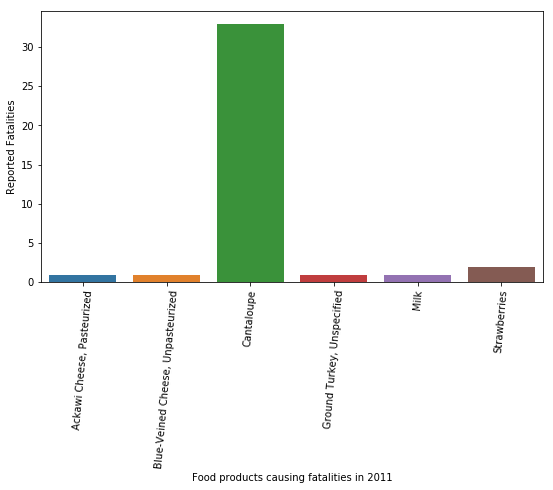

In [33]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)
food = food_index.index
sb.barplot(x = food, y = 'Fatalities', data = food_index)
ax.set(xlabel='Food products causing fatalities in 2011', ylabel='Reported Fatalities')

plt.xticks(rotation=85)

It looks like an outbreak of Listeria in cantaloupe may have caused the high fatalities in 2011. Were there high fatalaities throughout the year or was it just one outbreak causing lots of deaths? 

Text(0.5,0.98,'')

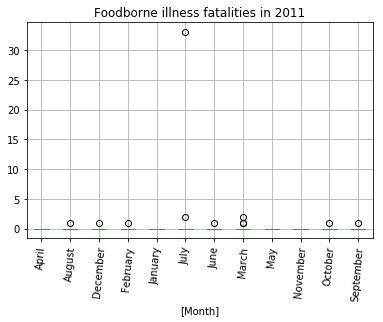

In [34]:
year2011 = outbreaks[outbreaks['Year'] == 2011]
year2011[['Month','Fatalities']].boxplot(by='Month')
plt.xticks(rotation=85)
plt.title('Foodborne illness fatalities in 2011')
plt.suptitle("")

It looks like there's one extreme outlier in July of 2011, a month in which lots of people eat cantaloupe in the US. So one outbreak of Listeria likely caused many deaths but not an unusual amount of illnesses. This is a very different pattern than the Norovirus. I'd like to compare histograms for reported Listeria and Norovirus illness and fatality in the US, 1998-2015.

# Do Listeria and Norovirus foodborne illness outbreaks show different patterns in the US?

Norovirus is a contagious virus so it can be easily transferred to cooked and uncooked food during food preparation or picked up from restaurant tables. I expect to see larger numbers of people infected by norovirus for each outbreak since it is so contagious. Listeria seems to be much more deadly than norovirus so I expect to see more people killed per outbeak from listeria.

In [35]:
#select by contaminant
outbreaks_species1 = outbreaks[outbreaks['Species'] == 'Listeria monocytogenes']
outbreaks_species2 = outbreaks[outbreaks['Species'] == 'Norovirus genogroup I']

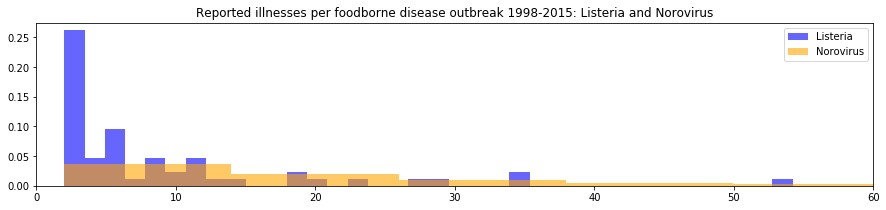

In [36]:
a4_dims =(15, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(x=outbreaks_species1['Illnesses'],normed = True, bins = 100,label = 'Listeria', alpha = .6, color = 'blue')
plt.hist(x=outbreaks_species2['Illnesses'], normed = True, bins = 100,label = 'Norovirus', alpha = .6, color = 'orange')


plt.title('Reported illnesses per foodborne disease outbreak 1998-2015: Listeria and Norovirus')
plt.xlim(0,60)
plt.legend(loc='upper right')
plt.show()

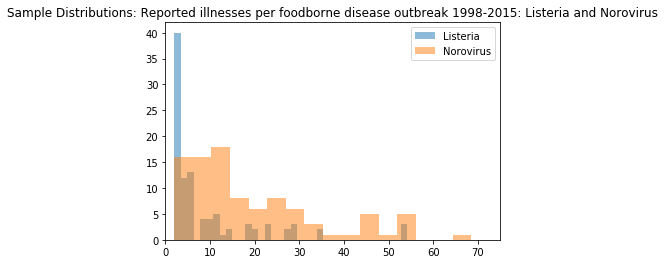

MannwhitneyuResult(statistic=2299.5, pvalue=1.8846167866813352e-11)

In [37]:
#Do sample distributions and probability test
Listeria = np.random.choice(outbreaks_species1['Illnesses'], 100, replace=True)
Norovirus = np.random.choice(outbreaks_species2['Illnesses'], 100, replace=True)


plt.hist(Listeria, bins = 100, alpha=0.5, label='Listeria') 
plt.hist(Norovirus, bins= 100, alpha=0.5, label='Norovirus') 
plt.legend(loc='upper right') 
plt.xlim(0,75)
plt.title('Sample Distributions: Reported illnesses per foodborne disease outbreak 1998-2015: Listeria and Norovirus')
plt.show()
mannwhitneyu(Listeria, Norovirus)

Since the sample distributions are not normal, I used a Mann Whitney U test. The resulting p value for the Mann Whitney U test is well below 0.05 showing that the differences between the two populations in the histogram are probably not due to chance. The U statistic is quite large showing that there are large differences between the two populations in the histogram. Norovirus likely infects many more people than Listeria with each foodborne illness outbreak.

In [38]:
#fill in nans
outbreaks_species1nan = outbreaks_species1.replace(np.nan,0)
outbreaks_species2nan = outbreaks_species2.replace(np.nan,0)

In [39]:
outbreaks_species1nan.Fatalities.value_counts()

0.0     28
1.0     16
2.0      3
3.0      3
5.0      2
7.0      2
33.0     1
4.0      1
8.0      1
21.0     1
Name: Fatalities, dtype: int64

There are over 20 non-zero values for Listeria fatalities 1998-2015 so I can do a Mann Whitney U probability test analysis.

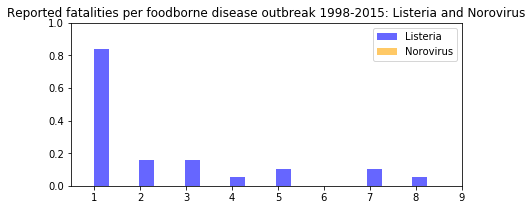

In [40]:
#plot Fatalities
a4_dims =(7, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(x=outbreaks_species1nan['Fatalities'],normed = True, bins = 100,label = 'Listeria', alpha = .6, color = 'blue')

plt.hist(x=outbreaks_species2nan['Fatalities'], normed = True, bins = 100,label = 'Norovirus', alpha = .6, color = 'orange')


plt.title('Reported fatalities per foodborne disease outbreak 1998-2015: Listeria and Norovirus')
plt.legend(loc='upper right')
plt.xlim(.5,9)
plt.ylim(0,1)
plt.show()
##Outlier Listeria was removed at just above 20.

Zero values and outliers were removed from the above histogram for better visualization.

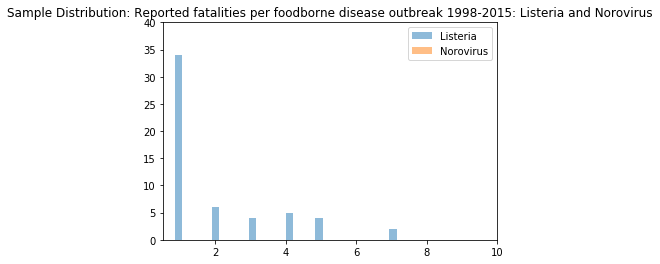

MannwhitneyuResult(statistic=2150.0, pvalue=8.528850192131911e-19)

In [41]:
#Do sample distributions and p test

Listeria = np.random.choice(outbreaks_species1nan['Fatalities'], 100, replace=True)
Norovirus = np.random.choice(outbreaks_species2nan['Fatalities'], 100, replace=True)

plt.hist(Listeria, bins = 100, alpha=0.5, label='Listeria') 
plt.hist(Norovirus, bins= 100, alpha=0.5, label='Norovirus') 
plt.legend(loc='upper right') 
plt.xlim(.5,10)
plt.ylim(0,40)
plt.title('Sample Distribution: Reported fatalities per foodborne disease outbreak 1998-2015: Listeria and Norovirus')
plt.show()
mannwhitneyu(Listeria, Norovirus)

Since the sample distributions are not normal, I used a Mann Whitney U test. The resulting p value for the Mann Whitney U test is well below 0.05. The differences between the two populations in the histogram are probably not due to chance. The U statistic is also quite high showing that there is a great difference between the 2 populations. In this histogram, Listeria fatalities show a similar pattern to Listeria illnesses. Usually 1 person is killed with each outbreak but sometimes multiple people are killed. Norovirus did not cause any deaths in 2011. Zero values and outliers were removed from the above histograms for better visualization.

# Which meat poisons larger numbers per outbreak?

I'd like to learn which food is the most risky to eat in the US, but value counts show too many unique values for the same types of food. I can search for meat keywords like chicken, turkey, ground beef and fish and create a new 'Meat' column in the dataframe. Then I can try to find out which meat is the most risky to eat.

In [42]:
outbreaks.Food.value_counts()

Multiple Foods                                                                    206
Oysters, Raw                                                                      165
Ground Beef, Hamburger                                                            127
Salad, Unspecified                                                                118
Chicken, Unspecified                                                              105
Sandwich, Submarine                                                                85
Chicken, Other                                                                     83
Lettuce-Based Salads Unspecified                                                   81
Pizza, Unspecified                                                                 81
Pork, Bbq                                                                          80
Fish, Mahi Mahi                                                                    78
Tuna, Unspecified                                     

First I searched the strings in the 'Food' column for different meat values using the find function, which returns -1 for False and index number for True. Then I added 1 to the result to convert -1 to zero, and zero index to 1, and I multiplied the result by the particular meat string I was searching for. All of this was saved in a new column named for the meat value I was searching for. Finally, I sliced the resulting value to the length of the meat string I was searching for.

In [43]:
outbreaks['Fish'] = outbreaks['Food'].apply(lambda x: ((int(str(x).find('Fish'))+1)*'Fish ')[:5] if x == x else np.nan)

In [44]:
outbreaks['Chicken'] = outbreaks['Food'].apply(lambda x: ((int(str(x).find('Chicken'))+1)*'Chicken ')[:8] if x == x else np.nan)

In [45]:
outbreaks['Ground Beef'] = outbreaks['Food'].apply(lambda x: ((int(str(x).find('Ground Beef'))+1)*'Ground Beef ')[:12] if x == x else np.nan)

In [46]:
outbreaks['Turkey'] = outbreaks['Food'].apply(lambda x: ((int(str(x).find('Turkey'))+1)*'Turkey ')[:7] if x == x else np.nan)

Next I created a new 'Meat' column by adding all of the values in the different meat colums together.

In [47]:
# Create meat column
outbreaks['Meat'] = outbreaks['Fish'].map(str) + outbreaks['Chicken'].map(str)+ outbreaks['Ground Beef'].map(str) + outbreaks['Turkey'].map(str)

Finally, I selected by the meats I wanted to analyze, so that cells with zeros, Nans, or multiple meats were not included in the analysis.

In [48]:
# Select by type of meat so zeros, NaNs, and cells with more than one meat are not include
meat = pd.DataFrame(outbreaks[outbreaks['Meat'].isin(['Fish ','Chicken ','Ground Beef ','Turkey '])])

In [49]:
#Group by meat 
meat2 = pd.DataFrame(meat.groupby('Meat').sum())
meat3 = meat2.sort_values(by = 'Fatalities', ascending = False)

Text(0.5,1,'Reported food poisoning incidents')

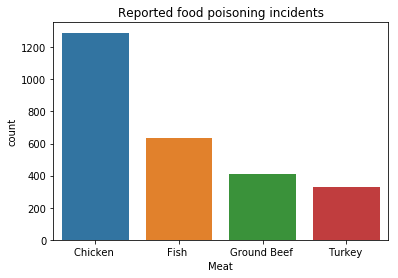

In [50]:
sb.countplot(x = 'Meat', data = meat, order = meat['Meat'].value_counts().index)
plt.title('Reported food poisoning incidents')

Chicken caused the most illness by far from 1998 to 2015, and turkey caused the least, but that's to be expected since Americans eat so much more chicken than turkey.

Text(0.5,1,'Reported food poisoning fatalities')

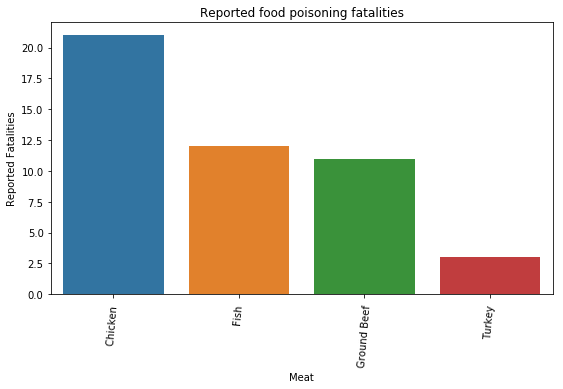

In [51]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)
meat = meat2.index
sb.barplot(x=meat, y='Fatalities', data = meat3)
plt.xticks(rotation=85)
ax.set(xlabel='Meat', ylabel='Reported Fatalities')
plt.title('Reported food poisoning fatalities')

Chicken also caused many more fatalities from 1998 to 2015, and Turkey caused the least, but that's to be expected since Americans eat so much chicken. I'd like to compare histograms of chicken and turkey foodborne illness to see if there are truly different patterns of infection between the two in the US.

In [52]:
#select turkey
turkey = pd.DataFrame(outbreaks.loc[outbreaks['Meat'].isin(['Turkey '])])


In [53]:
#select chicken
chicken = pd.DataFrame(outbreaks.loc[outbreaks['Meat'].isin(['Chicken '])])

I expect to see different patterns of illness between turkey food poisoning and chicken food poisoning in the US because they are usually caused by different contaminants, and fed in different potions. Clostridium perfringens, a bacteria that grows on cooked meat, is often the cause of food poisoning from Turkey. Clostridium perfringnes grows on whole cooked turkeys at Thanksgiving and Christmas when they're left out to cool at room temperature, so it affects everybody who eats it. Chicken is often cooked in individual portions and not left out to cool. With chicken the culprit is usually salmonella from preparing raw chicken or from eating undercooked chicken.

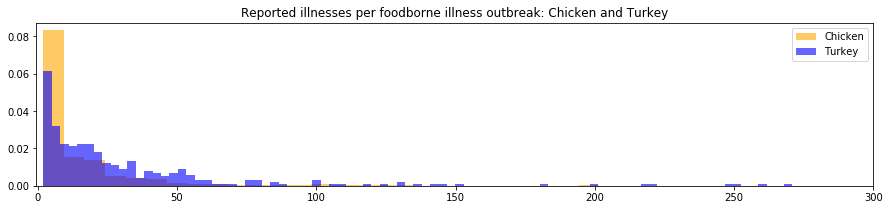

In [54]:
a4_dims =(15, 3)
fig, ax = plt.subplots(figsize=a4_dims)
plt.hist(x=chicken['Illnesses'], normed = True, bins = 100,label = 'Chicken', alpha = .6, color = 'orange')

plt.hist(x=turkey['Illnesses'],normed = True, bins = 100,label = 'Turkey', alpha = .6, color = 'blue')
plt.title('Reported illnesses per foodborne illness outbreak: Chicken and Turkey')
plt.xlim(-.5,300)
plt.legend(loc='upper right')
plt.show()
#normalize the histogram to make up for differences in the number of incidents 

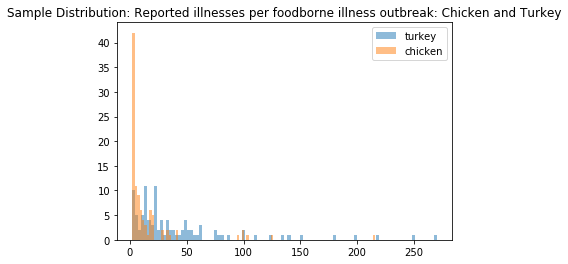

MannwhitneyuResult(statistic=2192.5, pvalue=3.1915960339317335e-12)

In [55]:
##Do sample distributions and probability test
turkeys = np.random.choice(turkey['Illnesses'], 100, replace=True)
chickens = np.random.choice(chicken['Illnesses'],100, replace=True)

plt.hist(turkeys, bins = 100, alpha=0.5, label='turkey') 
plt.hist(chickens, bins= 100, alpha=0.5, label='chicken') 
plt.legend(loc='upper right') 
plt.title('Sample Distribution: Reported illnesses per foodborne illness outbreak: Chicken and Turkey')
plt.show()
mannwhitneyu(turkeys, chickens)

The Mann Whitney U probability test shows that the differences between turkey and chicken poisoning patterns is not random and the large U statistic shows that these patterns are quite different.  The histogram shows that turkey likely sickens individual people much less often than chicken. Turkey also has many more outliers in the hundreds. Both findings are consistent with the fact that most contaminated turkey in the US is cooked whole and fed to a crowd of people at Thanksgiving. I'd like to see if the data shows a bump in turkey poisonings in November.

In [56]:
#group by turkey, month
turkey_month = turkey.groupby('Month').sum()
print(turkey_month)

             Year  Illnesses  Hospitalizations  Fatalities
Month                                                     
April       34076        463               9.0         0.0
August      36071        347              24.0         1.0
December   118269       2617              19.0         1.0
February    28069        654              55.0         1.0
January     28055        451              10.0         0.0
July        38106        458              11.0         8.0
June        48053        639              29.0         1.0
March       32068        423               3.0         0.0
May         40081        748              91.0         8.0
November   174466       2765              66.0         0.0
October     44084        564              25.0         0.0
September   38112        446              10.0         1.0


[Text(0,0.5,'Reported Incidents'),
 Text(0.5,0,'Turkey poisoning incidents 1998-2015')]

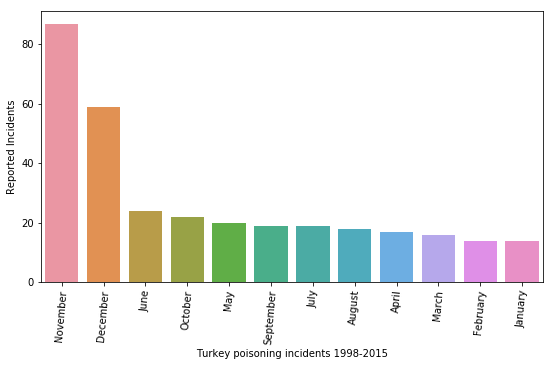

In [57]:
a4_dims = (9, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sb.countplot(x='Month',data=turkey,order = turkey['Month'].value_counts().index)
plt.xticks(rotation=85)
ax.set (xlabel = 'Turkey poisoning incidents 1998-2015', ylabel = 'Reported Incidents')

Turkey, as expected, causes many more outbreaks of food poisoning in November and December than it does for the rest of the year, when it is mostly eaten as cold cuts and ground meat. So Turkey is most dangerous in November, when it is cooked whole, but I think most Americans are going to keep on eating it for Thanksgiving anyway.

Now I'd like to look at histograms of chicken and fish to see if fish sickens people in larger numbers.

In [58]:
#select by fish
fish = pd.DataFrame(outbreaks.loc[outbreaks['Meat'].isin(['Fish '])])

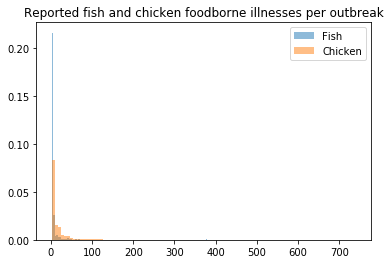

In [59]:
plt.hist(fish['Illnesses'], normed = True, bins = 100, label = "Fish", alpha = .5)
plt.hist(chicken['Illnesses'],normed = True, bins = 100, label = 'Chicken', alpha = .5)
plt.title('Reported fish and chicken foodborne illnesses per outbreak')
plt.legend(loc ='upper right')

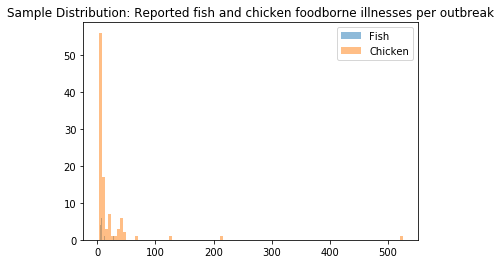

MannwhitneyuResult(statistic=3334.5, pvalue=1.737307008065537e-05)

In [60]:
fishes = np.random.choice(fish['Illnesses'], 100, replace=True)
chickens = np.random.choice(chicken['Illnesses'],100, replace=True)

plt.hist(fishes, bins = 100, alpha=0.5, label='Fish') 

plt.hist(chickens, bins= 100, alpha=0.5, label='Chicken') 

plt.legend(loc='upper right') 
plt.title('Sample Distribution: Reported fish and chicken foodborne illnesses per outbreak')

plt.show()
mannwhitneyu(fishes, chickens)
#removed chicken outliers for better visualization

The Mann Whitney U probability test shows that the differences between fish and chicken poisoning patterns is not random and the large U statistic shows that these patterns are quite different. The histograms show that fish sickens way more people in individual portions than chicken does. I guess you have to make sure each individual fish is fresh. Outliers were removed from the above plots for better visualization.

Turkey wins. It is the meat most likely to poison large numbers of people at a time, in the US.

# Which state is the most dangerous for going out to eat?

In [61]:
#select by restaurant, home-cooked
outbreaksloc = pd.DataFrame(outbreaks.loc[outbreaks['Location'].isin(['Restaurant','Private Home/Residence'])])

[Text(0,0.5,'Reported Incidents'),
 Text(0.5,0,'Reported food poisoning incidents 1998-2015')]

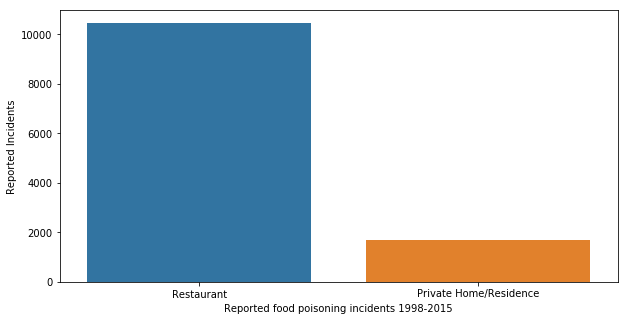

In [62]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sb.countplot(x='Location', data = outbreaksloc)
ax.set (xlabel = 'Reported food poisoning incidents 1998-2015', ylabel = 'Reported Incidents')


This data seems to show, quite glaringly, that it is much more dangerous to eat restaurant food than home-cooked food in the US. However, this could be because home-cooked food poisoning is reported much less. Let me compare these 2 values in a histogram to see if they really are different.

In [63]:
#select by restaurant
outbreaks_rest = pd.DataFrame(outbreaks.loc[outbreaks['Location'].isin(['Restaurant'])])

In [64]:
#select by home-cooked
outbreaks_home = pd.DataFrame(outbreaks.loc[outbreaks['Location'].isin(['Private Home/Residence'])])

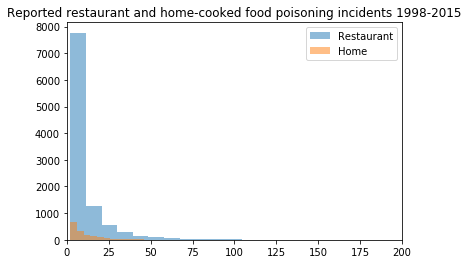

In [65]:
plt.hist(outbreaks_rest['Illnesses'], bins = 100, alpha = .5,label = "Restaurant")
plt.hist(outbreaks_home['Illnesses'], bins = 100, alpha = .5, label = "Home")
plt.xlim(0,200)
plt.title('Reported restaurant and home-cooked food poisoning incidents 1998-2015')
plt.legend(loc='upper right')

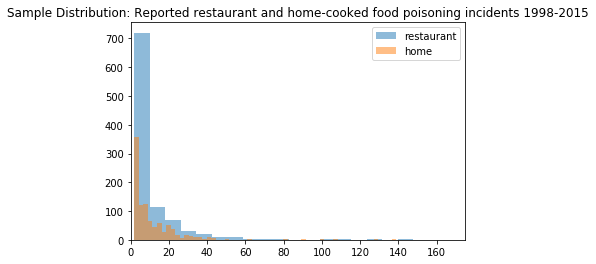

MannwhitneyuResult(statistic=446577.5, pvalue=1.6136220516557616e-05)

In [66]:
restaurant = np.random.choice(outbreaks_rest['Illnesses'], 1000, replace=True)
home = np.random.choice(outbreaks_home['Illnesses'],1000, replace=True)

plt.hist(restaurant, bins = 100, alpha=0.5, label='restaurant') 
plt.hist(home, bins= 100, alpha=0.5, label='home') 
plt.legend(loc='upper right') 
plt.xlim(0,175)
plt.title('Sample Distribution: Reported restaurant and home-cooked food poisoning incidents 1998-2015')
plt.show()
mannwhitneyu(restaurant, home)
#one restaurant outlier removed from plot.

Outliers were removed from the above plot for better visualization. The Mann Whitney U statistic is extremely high and the p value is below .05 for a sample size of 1000. There are big differences between restaurant and home food poisoning patterns.  Although the shape of the histograms are very similar, the peak is much higher for reported resaurant food poisoning incidents. I'd like to look state-by-state at just restaurants to see which state is the most dangerous state for eating out. First I'll import a .csv file listing state populations and create a new column in the outbreaks dataframe for food poisoning illnesses per capita for each state. 

In [67]:
#population data is from 2010
pops = pd.read_csv('pops - Sheet2.csv', thousands=',')


In [68]:
#select by restaurant in 2010
outbreaks_rest = outbreaks[outbreaks['Location']=='Restaurant']
outbreaks_2010 = outbreaks_rest[outbreaks_rest["Year"] == 2010]


In [69]:
#merge files
outbreaks_2010 = pd.merge(outbreaks_2010, pops, how='inner', on='State')

outbreaks_2010.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,...,Fatalities,Foodsplit,Speciessplit,Fish,Chicken,Ground Beef,Turkey,Meat,Rank,Population
0,2010,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,3,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,nannannannan,1,37253956
1,2010,January,California,Restaurant,NaN,NaN,Norovirus unknown,NaN,Suspected,4,...,0.0,NaN,Norovirus unknown,NaN,NaN,NaN,NaN,nannannannan,1,37253956
2,2010,January,California,Restaurant,NaN,NaN,Norovirus genogroup II,NaN,Confirmed,6,...,0.0,NaN,Norovirus genogroup II,NaN,NaN,NaN,NaN,nannannannan,1,37253956
3,2010,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,13,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,nannannannan,1,37253956
4,2010,January,California,Restaurant,"Chicken, Grilled",Chicken,Norovirus unknown,NaN,Suspected,8,...,0.0,"Chicken, Grilled",Norovirus unknown,,Chicken,,,Chicken,1,37253956


In [70]:
#create collumn for #illnesses/state population
outbreaks_2010['percapita'] = (outbreaks_2010['Illnesses']/outbreaks_2010['Population'])*100

In [71]:
outbreaks_2010.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,...,Foodsplit,Speciessplit,Fish,Chicken,Ground Beef,Turkey,Meat,Rank,Population,percapita
0,2010,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,nannannannan,1,37253956,0.000008
1,2010,January,California,Restaurant,NaN,NaN,Norovirus unknown,NaN,Suspected,4,...,NaN,Norovirus unknown,NaN,NaN,NaN,NaN,nannannannan,1,37253956,0.000011
2,2010,January,California,Restaurant,NaN,NaN,Norovirus genogroup II,NaN,Confirmed,6,...,NaN,Norovirus genogroup II,NaN,NaN,NaN,NaN,nannannannan,1,37253956,0.000016
3,2010,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,13,...,NaN,NaN,NaN,NaN,NaN,NaN,nannannannan,1,37253956,0.000035
4,2010,January,California,Restaurant,"Chicken, Grilled",Chicken,Norovirus unknown,NaN,Suspected,8,...,"Chicken, Grilled",Norovirus unknown,,Chicken,,,Chicken,1,37253956,0.000021


In [72]:
#group by state
outbreaks_states = pd.DataFrame(outbreaks_2010.groupby(['State']).sum().reset_index())
outbreaks_states.head()


,State,Year,Illnesses,Hospitalizations,Fatalities,Rank,Population,percapita
0,Alabama,4020,31,0.0,0.0,46,9559472,0.000649
1,Alaska,2010,7,2.0,0.0,47,710231,0.000986
2,Arizona,2010,10,1.0,0.0,16,6392017,0.000156
3,California,86430,407,19.0,0.0,43,1601920108,0.001093
4,Colorado,24120,112,7.0,0.0,264,60350352,0.002227


In [73]:
#select states with most illnesses
states = outbreaks_states[outbreaks_states['percapita']>.002]
states = states.sort_values(by ='percapita',ascending = False)
states.head()

,State,Year,Illnesses,Hospitalizations,Fatalities,Rank,Population,percapita
24,Oregon,34170,275,3.0,0.0,459,65128258,0.007178
15,Minnesota,54270,303,2.0,0.0,567,143205975,0.005713
5,Connecticut,24120,172,7.0,0.0,348,42889164,0.004812
32,Wisconsin,20100,254,1.0,0.0,200,56869860,0.004466
26,Rhode Island,6030,36,1.0,0.0,129,3157701,0.003420


[Text(0,0.5,'Percent population reporting restaurant food poisoning in 2010'),
 Text(0.5,0,'Most dangerous states for going out to eat in 2010')]

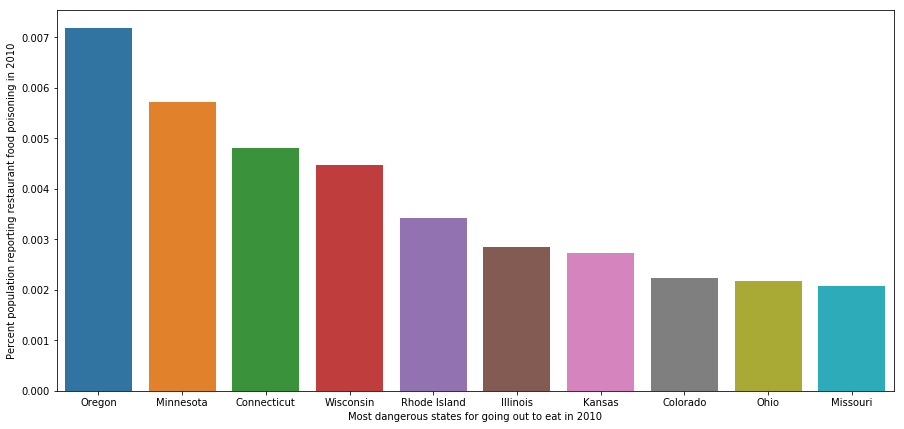

In [74]:
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
sb.barplot(x='State', y='percapita', data = states)
ax.set(xlabel='Most dangerous states for going out to eat in 2010', ylabel='Percent population reporting restaurant food poisoning in 2010')

2010 is the year of my population data, so I looked at restaurant poisoning in 2010 in the US. It looks like Oregon was the most dangerous state for going out to eat in 2010. Maybe Oregon's high rates of restaurant food poisoning are due to the types of food eaten or maybe they are caused by a difference in the way restaurants are inspected. I'd like to see if histograms of restaurant food poisoning in Oregon and New York show different patterns. New York has a large population of restaurant-goers so there will still be plenty of values even though it has low rates of restaurant food poisoning. 

In [75]:
#select by state
oregon = outbreaks_2010[outbreaks_2010['State'].isin(['Oregon'])]
newyork = outbreaks_2010[outbreaks_2010['State'].isin(['New York'])]


Text(0.5,1,'Reported restaurant food poisoning incidents in 2010')

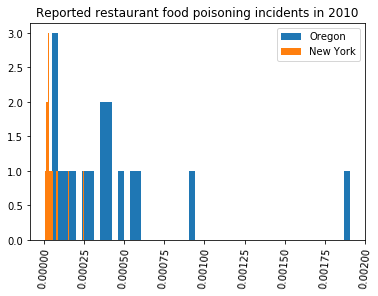

In [76]:
plt.hist(oregon['percapita'], bins = 50, label = "Oregon")
plt.hist(newyork['percapita'],bins = 50, label = "New York")
plt.legend(loc='upper right')
plt.xticks(rotation=85)
plt.title('Reported restaurant food poisoning incidents in 2010')

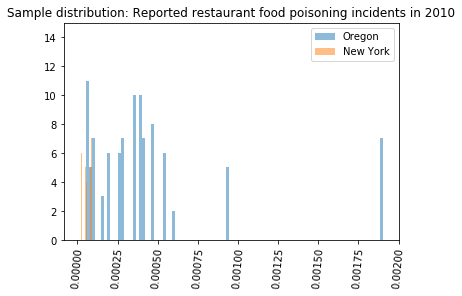

MannwhitneyuResult(statistic=498.0, pvalue=1.7213145473058358e-28)

In [77]:
#plot sample distributions and do p test
oregons = np.random.choice(oregon['percapita'], 100, replace=True)
newyorks = np.random.choice(newyork['percapita'],100, replace=True)

plt.hist(oregons, bins = 100, alpha=0.5, label='Oregon') 
plt.hist(newyorks, bins= 100, alpha=0.5, label='New York') 
plt.ylim(0,15)
plt.xticks(rotation=85)
plt.legend(loc='upper right')
plt.title('Sample distribution: Reported restaurant food poisoning incidents in 2010')
plt.show()

mannwhitneyu(oregons, newyorks)

The Mann Whitney U p value is very, very low and the histograms show that restaurant-goers in Oregon were poisoned in much larger numbers than in New York. Oregon has lower taxes and fewer government services than New York so perhaps restaurants are inspected less often than in New York. The restaurants in Oregon also serve lots of home-brews and delicious local soft cheeses which may not have the best quality control. It might be worth the risk!

## Further Research

For further research with this dataset it would be great to bring in some numbers that aren't in the outbreaks.csv file. I'd like to know the amount of chicken, turkey, fish and ground beef eaten in the US. That way I could compare illnesses per pound for each meat. I'd also like to learn more about the different rates of restaurant inspection in New York and Oregon and the rates of contamination for local brews and cheeses vs. national or international brands. 

Lastly, I'd like to see a dataset with some food chain information. You could look at how fresh produce products cause disease outbreaks that look different from those of cooked products like meats, eggs, or dairy. You could also look at which farms are safer and look at the different climates and regulations where these farms are located.